# Gerador

In [1]:
from LaviRot import *
import scipy as sp
import numpy as np

import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact

np.set_printoptions(precision=3, linewidth=300)
%matplotlib inline

For this example we will consider a compressor with shaft and impellers made from AISI 4340, which has the following properties.

In [2]:
E = 205e9
Gs = 79.5e9
rho = 7850

Shaft's inner and outer diameter will be:

In [3]:
si_d = 0
so_d = 0.28

Now we define the length for each element, starting at the first element on the left (the element that will have the thrust collar).

In [4]:
L = [0.1, 
    0.152,
    0.152, 
    0.1075,
    0.1075,
    0.2,
    0.057,
    0.0983,  
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.25018, # Rotor Core
    0.1783,  # Rotor Core
    0.057,
    0.1975,
    0.110,
    0.110,
    0.186,
    0.0945,
    0.04,    
    0.0923,  # Fan
    0.0498,  
    0.0802,  # Aux. Exciter
    0.2067,
    0.121,   # Exciter
    0.01]    # Diode Wheel

SI_D = [0, # thrust collar
    0,
    0, # 0 probe
    0, # 0 bearing
    0,
    0,
    0,
    0, # 0 impeller
    0, # 1 impeller
    0, # 2 impeller
    0, # 3 impeller
    0, # 4 impeller
    0, # 5 impeller
    0, # honeycomb # change diameter
    0,
    0,
    0.05,
    0.05, # 1 bearing
    0.05,
    0.05, # 2 impeller
    0.05, # 3 impeller
    0.05, # 4 impeller
    0.05, # 5 impeller
    0.05, # honeycomb # change diameter
    0.05,
    0.05,
    0.05,
    0.05, # 1 bearing
    0.05,
    0.05]

SO_D = [0.56, # thrust collar
    0.28,
    0.28, # 0 probe
    0.28, # 0 bearing
    0.28,
    0.28,
    0.41,
    0.5159, # 0 impeller
    0.5159, # 1 impeller
    0.5159, # 2 impeller
    0.5159, # 3 impeller
    0.5159, # 4 impeller
    0.5159, # 5 impeller
    0.5159, # honeycomb # change diameter
    0.5159,
    0.5159,
    0.5159,
    0.41, # 1 bearing
    0.28,
    0.28, # 2 impeller
    0.28, # 3 impeller
    0.28, # 4 impeller
    0.225, # 5 impeller
    0.205, # honeycomb # change diameter
    0.205,
    0.192,
    0.192,
    0.1802, # 1 bearing
    0.173,
    0.166]

RHO = [7850, # thrust collar
    7850,
    7850, # 0 probe
    7850, # 0 bearing
    7850,
    7850,
    7850,
    6636.7, # 0 impeller
    6636.7, # 1 impeller
    6636.7, # 2 impeller
    6636.7, # 3 impeller
    6636.7, # 4 impeller
    6636.7, # 5 impeller
    6636.7, # honeycomb # change diameter
    6636.7,
    6636.7,
    6636.7,
    7850, # 1 bearing
    7850,
    7850, # 2 impeller
    7850, # 3 impeller
    7850, # 4 impeller
    7850, # 5 impeller
    7850, # honeycomb # change diameter
    7850,
    7850,
    7850,
    7850, # 1 bearing
    7850,
    7850]

The next line defines a list with the number of each element (from 0 to len(L)).

In [5]:
nelem = [x for x in range(len(L))]

In [6]:
shaft_elem = [ShaftElement(n, l, si_d, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l in zip(nelem, L)]

Ajustando os valores dos diametros internos, diametros externos e massa especifica para cada elemento do eixo

In [7]:
contador = sp.linspace(0, len(L)-1, len(L))
for i in contador:
    shaft_elem[int(i)].i_d = SI_D[int(i)]
    shaft_elem[int(i)].o_d = SO_D[int(i)]
    shaft_elem[int(i)].rho = RHO[int(i)]

In [8]:
disk0 = DiskElement(8, RHO[int(8)], 0.02, SO_D[int(8)], 0.2)     # Rotor Core
disk1 = DiskElement(9, RHO[int(9)], 0.02, SO_D[int(9)], 0.2)     # Rotor Core
disk2 = DiskElement(10, RHO[int(10)], 0.02, SO_D[int(10)], 0.2)  # Rotor Core
disk3 = DiskElement(11, RHO[int(11)], 0.02, SO_D[int(11)], 0.2)  # Rotor Core
disk4 = DiskElement(12, RHO[int(12)], 0.02, SO_D[int(12)], 0.2)  # Rotor Core
disk5 = DiskElement(13, RHO[int(13)], 0.02, SO_D[int(13)], 0.2)  # Rotor Core
disk6 = DiskElement(14, RHO[int(14)], 0.02, SO_D[int(14)], 0.2)  # Rotor Core
disk7 = DiskElement(15, RHO[int(15)], 0.02, SO_D[int(15)], 0.2)  # Rotor Core
disk8 = DiskElement(16, RHO[int(16)], 0.02, SO_D[int(16)], 0.2)  # Rotor Core
disk9 = DiskElement(24, RHO[int(24)], 0.02, SO_D[int(24)], 0.2)  # Fan
disk10 = DiskElement(26, RHO[int(26)], 0.02, SO_D[int(26)], 0.2) # Aux. Exciter
disk11 = DiskElement(28, RHO[int(28)], 0.02, SO_D[int(28)], 0.2) # Exciter
disk12 = DiskElement(29, RHO[int(29)], 0.02, SO_D[int(29)], 0.2) # Diode Wheel

Ajustando os valores das massas, momento de inercia e momento de inercia polar para cada carregamento imposto em seu respectivo elemento do eixo

In [9]:
disk0.m = 706.25
disk0.Id = 82.85
disk0.Ip = 163.86

disk1.m = 1412.5
disk1.Id = 171.23
disk1.Ip = 327.73

disk2.m = 1412.5
disk2.Id = 171.23
disk2.Ip = 327.73

disk3.m = 1412.5
disk3.Id = 171.23
disk3.Ip = 327.73

disk4.m = 1412.5
disk4.Id = 171.23
disk4.Ip = 327.73

disk5.m = 1412.5
disk5.Id = 171.23
disk5.Ip = 327.73

disk6.m = 1412.5
disk6.Id = 171.23
disk6.Ip = 327.73

disk7.m = 1412.5
disk7.Id = 171.23
disk7.Ip = 327.73

disk8.m = 706.25
disk8.Id = 82.85
disk8.Ip = 163.86

disk9.m = 76.67
disk9.Id = 2.35
disk9.Ip = 4.59

disk10.m = 82
disk10.Id = 1.39
disk10.Ip = 2.68

disk11.m = 439.48
disk11.Id = 18.52
disk11.Ip = 13.69

disk12.m = 48.97
disk12.Id = 2.12
disk12.Ip = 1.21

Para o obtenção dos coeficientes de rigidez e amortecimento dos mancais foi considerado uma média entre os dados provenientes de maximum clearence e minimum clearence de cada mancal, supondo que este seria uma aproximação para o ponto de operação. Em relação a velocidade, como a velocidade de operação do sistema é de 1800 rpm, 188.5 rad/s ou 30 Hz, foi considerado também uma média dos dados obtidos para as velocidades de 1650 rpm e 1987.5 rpm, disponíveis no relatório do gerador. 

In [59]:
kxx0 = (2.9e8 + 2.85e8 + 2.69e8 + 2.61e8)/4 
kxy0 = (-1.71e8 - 1.55e8 - 2.6e8 - 2.44e8)/4 
kyx0 = (-1.17e9 - 1.13e9 - 1.32e9 - 1.26e9)/4 
kyy0 = (3.17e9 + 2.98e9 + 4.46e9 + 4.21e9)/4 
cxx0 = (9.26e5 + 7.83e5 + 6.58e5 + 5.45e5)/4 
cxy0 = (-2.1e6 - 1.66e6 - 2.17e6 - 1.73e6)/4 
cyx0 = (-2.15e6 - 1.695e6 - 2.23e6 - 1.78e6)/4 
cyy0 = (1.39e7 + 1.11e7 + 1.57e7 + 1.25e7)/4 

kxx1 = (3.2e8 + 3.05e8 + 2.9e8 + 2.82e8)/4 
kxy1 = (-2.08e8 - 1.75e8 - 2.85e8 - 2.7e8)/4 
kyx1 = (-1.34e9 - 1.23e9 - 1.43e9 - 1.38e9)/4 
kyy1 = (3.79e9 + 3.29e9 + 4.89e9 + 4.64e9)/4 
cxx1 = (9.87e5 + 8.22e5 + 7e5 + 5.8e5)/4 
cxy1 = (-2.37e6 - 1.84e6 - 2.35e6 - 1.89e6)/4 
cyx1 = (-2.42e6 - 1.855e6 - 2.42e6 - 1.94e6)/4 
cyy1 = (1.59e7 + 1.21e7 + 1.7e7 + 1.36e7)/4 


bearing0 = BearingElement(4, kxx=kxx0, kxy=kxy0, kyx=kyx0, kyy=kyy0, cxx=cxx0, cxy=cxy0, cyx=cyx0, cyy=cyy0)
bearing1 = BearingElement(20, kxx=kxx1, kxy=kxy1, kyx=kyx1, kyy=kyy1, cxx=cxx1, cxy=cxy1, cyx=cyx1, cyy=cyy1)


# Foi considerado que cxx e cyy são iguais para efeitos simplificadores

#kx0 = kxx0
#ky0 = kyy0
#cx0 = cxx0



#kx1 = kxx1
#ky1 = kyy1
#cx1 = cxx1


#bearing0 = BearingElement(4, kxx=kx0, kyy=kx0, cxx=cx0,cyy=cx0)
#bearing1 = BearingElement(20, kxx=kx1, kyy=kx1, cxx=cx1, cyy=cx1)

In [60]:
gerador = Rotor(shaft_elem,
                   [disk0, disk1, disk2, disk3, disk4, disk5, disk6, disk7, disk8,disk9, disk10, disk11, disk12],
                   [bearing0, bearing1])

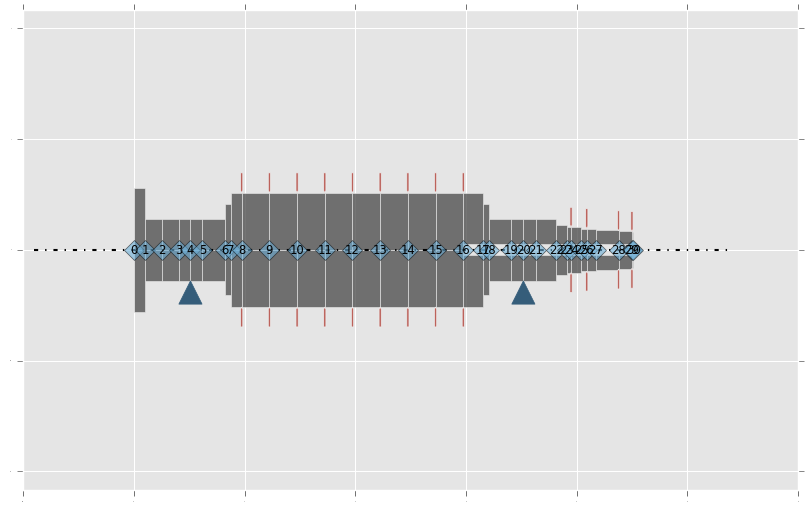

In [61]:
plot_rotor(gerador)

Now we are going to check the natural frequencies using the Campbell diagram.
First we need to define the speed range that we want to analyze.

In [62]:
speed = np.linspace(0, 450, 100)

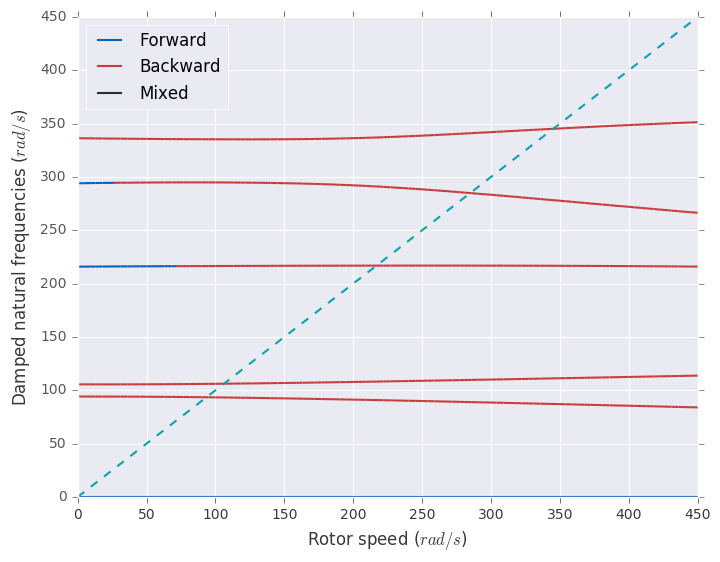

In [63]:
campbell(gerador, speed, mult=[1])

In [64]:
M = gerador.M()
C = gerador.C()
G = gerador.G()
K = gerador.K()
m=int(np.sqrt(np.size(M)))
U = np.ones(m)
# Inserindo desbalaceamento nó 8, lembrando que o primeiro nó é o nó 0
U[33] = 0.06
U[34] = 0.06
# Inserindo desbalaceamento nó 16, lembrando que o primeiro nó é o nó 0
U[65] = 0.06
U[66] = 0.06


#frequencias em rad/s

def resposta_frequencia(w0, wf):
    Omega = np.linspace(w0,wf,10*(wf-w0))
    X = sp.zeros((len(Omega), m))
    for i in range(len(Omega)):
        w=Omega[i]
        F=U*w**2

        Z=-1*w**2*M+1j*w*(C+G*w)+K
        Zinv=la.inv(Z)

        Xt=Zinv @ F
        Xabs = np.absolute(Xt)
        X[i] = sp.transpose(Xabs)

    return Omega, X

In [65]:
omega, x = resposta_frequencia(0, 450)

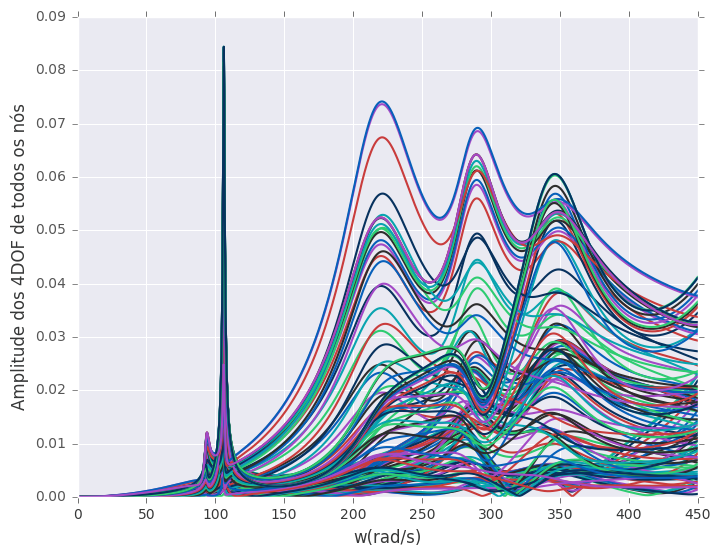

In [67]:
plt.plot(omega, x)
plt.ylabel('Amplitude dos 4DOF de todos os nós')
plt.xlabel('w(rad/s)')
plt.show()

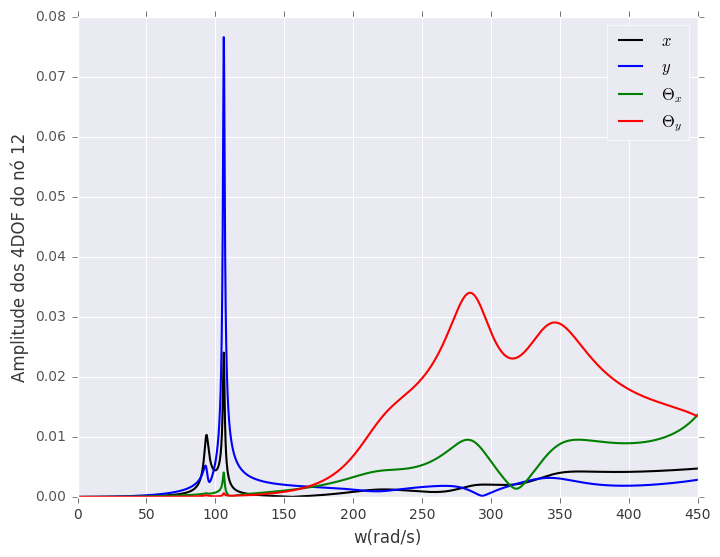

In [68]:
plt.plot(omega, x[:,48],'k-', label='$x$')
plt.plot(omega, x[:,49],'b-', label='$y$')
plt.plot(omega, x[:,50],'g-', label='$\Theta_x$')
plt.plot(omega, x[:,51],'r-', label='$\Theta_y$')
plt.ylabel('Amplitude dos 4DOF do nó 12')
plt.xlabel('w(rad/s)')
plt.legend()
plt.show()

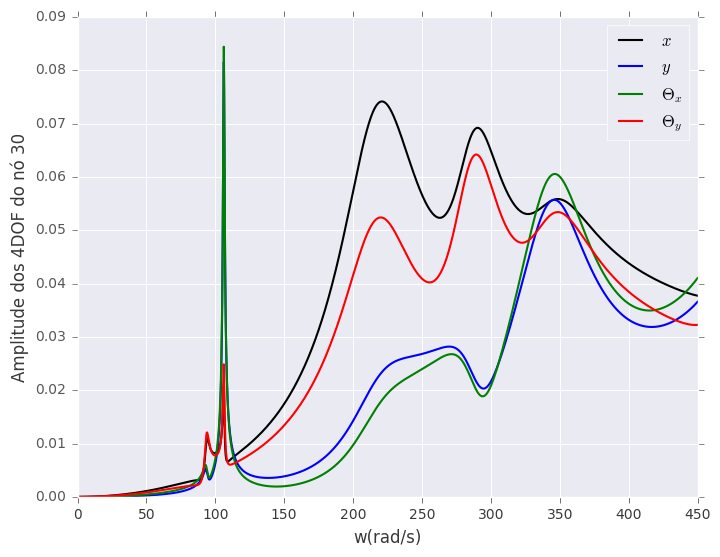

In [69]:
plt.plot(omega, x[:,120],'k-', label='$x$')
plt.plot(omega, x[:,121],'b-', label='$y$')
plt.plot(omega, x[:,122],'g-', label='$\Theta_x$')
plt.plot(omega, x[:,123],'r-', label='$\Theta_y$')
plt.ylabel('Amplitude dos 4DOF do nó 30')
plt.xlabel('w(rad/s)')
plt.legend()
plt.show()

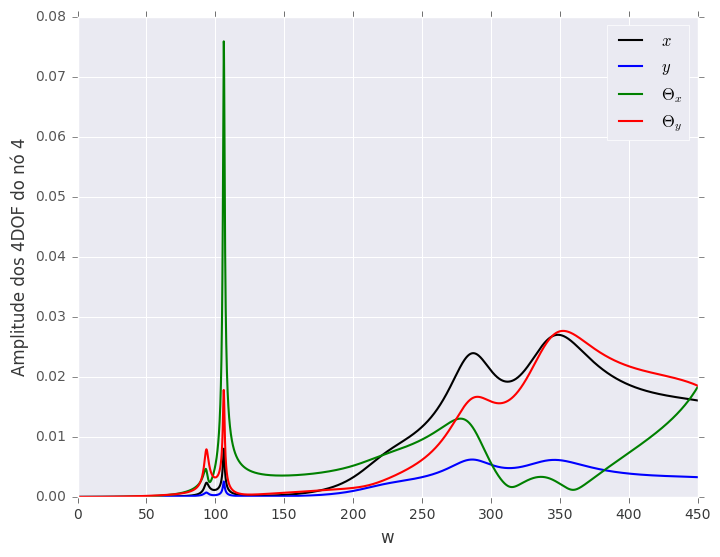

In [70]:
plt.plot(omega, x[:,16],'k-', label='$x$')
plt.plot(omega, x[:,17],'b-', label='$y$')
plt.plot(omega, x[:,18],'g-', label='$\Theta_x$')
plt.plot(omega, x[:,19],'r-', label='$\Theta_y$')
plt.ylabel('Amplitude dos 4DOF do nó 4')
plt.xlabel('w')
plt.legend()
plt.show()

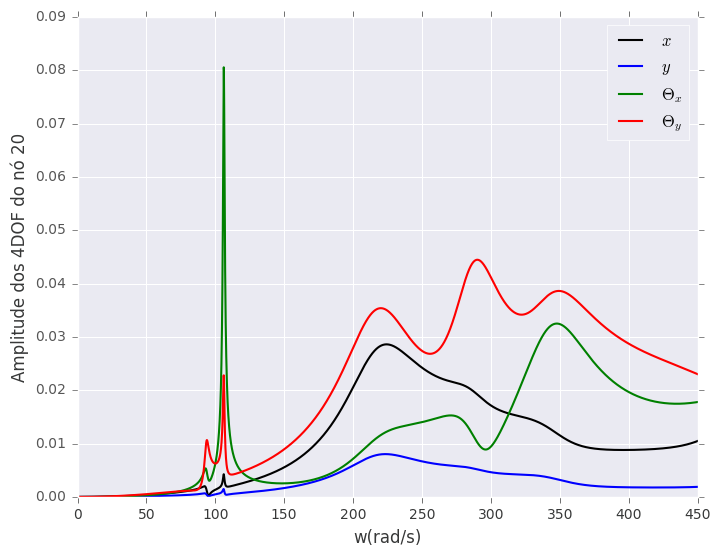

In [71]:
plt.plot(omega, x[:,80],'k-', label='$x$')
plt.plot(omega, x[:,81],'b-', label='$y$')
plt.plot(omega, x[:,82],'g-', label='$\Theta_x$')
plt.plot(omega, x[:,83],'r-', label='$\Theta_y$')
plt.ylabel('Amplitude dos 4DOF do nó 20')
plt.xlabel('w(rad/s)')
plt.legend()
plt.show()